In [1]:
import urllib, cStringIO
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from get_point_history import pget
from point_history import getmes
from get_point_map import get

In [3]:
from IPython.display import HTML, display

In [4]:
import matplotlib.dates as mdates

In [5]:
import pandas as pd
import pickle
import folium
from folium import plugins

In [6]:
from grid import *
from dep import *

In [7]:
from scipy.ndimage import imread

In [8]:
from netCDF4 import Dataset

In [9]:
from mpl_toolkits.basemap import Basemap, shiftgrid

In [10]:
import itertools

In [11]:
import os

In [12]:
%matplotlib notebook

In [13]:
import matplotlib
matplotlib.style.use('ggplot')

In [14]:
import datetime

In [15]:
date=datetime.datetime(2016,12,13,0)

In [16]:
path='/mnt/web/brey/hincast/'

In [17]:
basename='med'

In [18]:
SAVEPATH='bulletin/'

In [19]:
if not os.path.exists(SAVEPATH): os.makedirs(SAVEPATH)

In [20]:
OFILE='Locations.txt'

In [21]:
obs=pd.read_csv(OFILE,delimiter='\t')

In [22]:
obs

,ID,NAME,latobs,lonobs
0,1630,Almeira (ES),36.72506,-2.468386
1,1706,Valencia (ES),39.44040,-0.299000
2,819,Barcelona (ES),41.27749,2.213909
3,1449,Ibiza (ES),38.79034,1.450980
4,1461,Palma de Mallorca (ES),39.39457,2.614552
5,100080,Cartagena (ES),37.45276,-0.982284
6,1741,Sete (FR),43.31857,3.761195
7,1721,Cannes (FR),43.44241,6.971288
8,938,Melilla (ES),35.38344,-2.867047
9,100062,Saida Marina (MA),35.18242,-2.271415


In [23]:
#first graph

In [24]:
tdate=datetime.datetime.strftime(date,"%Y%m%d%H")
tdate24=datetime.datetime.strftime(date+datetime.timedelta(days=1),"%Y%m%d%H")
tdate48=datetime.datetime.strftime(date+datetime.timedelta(days=2),"%Y%m%d%H")
tdate72=datetime.datetime.strftime(date+datetime.timedelta(days=3),"%Y%m%d%H")

In [25]:
fdate=datetime.datetime.strftime(date,"%Y%m%d.%H")
fdate24=datetime.datetime.strftime(date+datetime.timedelta(days=1),"%Y%m%d.%H")
fdate48=datetime.datetime.strftime(date+datetime.timedelta(days=2),"%Y%m%d.%H")
fdate72=datetime.datetime.strftime(date+datetime.timedelta(days=3),"%Y%m%d.%H")

In [26]:
obs=obs.set_index('ID')

In [27]:
obs.head()

,NAME,latobs,lonobs
ID,,,
1630,Almeira (ES),36.72506,-2.468386
1706,Valencia (ES),39.44040,-0.299000
819,Barcelona (ES),41.27749,2.213909
1449,Ibiza (ES),38.79034,1.450980
1461,Palma de Mallorca (ES),39.39457,2.614552


In [28]:
obs[['latobs','lonobs']] = obs[['latobs','lonobs']].apply(pd.to_numeric)

In [29]:
url2='http://oiswww.eumetsat.org/IPPS/html/latestImages/EUMETSAT_MSG_IR108Color_CentralEurope.jpg'

In [30]:
url3='http://oiswww.eumetsat.org/IPPS/html/latestImages/EUMETSAT_MSG_RGBNatColour_CentralEurope.jpg'

In [31]:
urllib.urlretrieve(url2,filename=SAVEPATH+'sat1.png')

('bulletin/sat1.png', <httplib.HTTPMessage instance at 0x7fd1cbbfc518>)

In [32]:
urllib.urlretrieve(url3,filename=SAVEPATH+'sat2.png')

('bulletin/sat2.png', <httplib.HTTPMessage instance at 0x7fd1cbbfc248>)

In [33]:
url4='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},0,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate)

In [34]:
url5='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},24,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate24)

In [35]:
urllib.urlretrieve(url4,filename=SAVEPATH+'e0.png')

('bulletin/e0.png', <httplib.HTTPMessage instance at 0x7fd1cbc17200>)

In [36]:
urllib.urlretrieve(url5,filename=SAVEPATH+'e24.png')

('bulletin/e24.png', <httplib.HTTPMessage instance at 0x7fd1cbc175a8>)

In [37]:
url6='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},48,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate48)

In [38]:
url7='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},72,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate72)

In [39]:
urllib.urlretrieve(url6,filename=SAVEPATH+'e48.png')

('bulletin/e48.png', <httplib.HTTPMessage instance at 0x7fd1cbc17b90>)

In [40]:
urllib.urlretrieve(url7,filename=SAVEPATH+'e72.png')

('bulletin/e72.png', <httplib.HTTPMessage instance at 0x7fd1cbc17f38>)

In [41]:
url_0='http://www.helios-hotels.com/playa_hel.jpg'
urllib.urlretrieve(url_0,filename=SAVEPATH+'helios.png')

('bulletin/helios.png', <httplib.HTTPMessage instance at 0x7fd1cbc17dd0>)

In [42]:
url_1 = 'http://www.mareografico.it/DATA/Ginostra.jpg'
urllib.urlretrieve(url_1,filename=SAVEPATH+'ginostra.png')

('bulletin/ginostra.png', <httplib.HTTPMessage instance at 0x7fd1cbc1f3b0>)

In [43]:
url_2='http://www.webcam.comune.genova.it/images_out/current.jpg'
urllib.urlretrieve(url_2,filename=SAVEPATH+'genova.png')

('bulletin/genova.png', <httplib.HTTPMessage instance at 0x7fd1cbc1f6c8>)

In [44]:
url_3='http://93.62.201.235/maree/WEBCAM/smarcoweb2.jpg'
urllib.urlretrieve(url_3,filename=SAVEPATH+'venice.png')

('bulletin/venice.png', <httplib.HTTPMessage instance at 0x7fd1cbc1fa28>)

In [83]:
url_4='http://tsunami.jrc.it/webcams/Kapsali_LAST.jpg'
urllib.urlretrieve(url_4,filename=SAVEPATH+'kapsali.png')

('bulletin/kapsali.png', <httplib.HTTPMessage instance at 0x7fd1a78fc0e0>)

In [45]:
ppath=path+'{}/'.format(datetime.datetime.strftime(date,"%Y%m%d.%H"))

In [46]:
# read grid and bath
grid = Grid.fromfile(ppath+basename+'.grd')
deb0=Dep.read(ppath+basename+'.dep',grid.shape)
wv=np.isnan(deb0.val).T

In [47]:
with open(ppath+basename+'.pkl', 'r') as f:
    ptr=pickle.load(f)

In [48]:
#read the netCDF file
try:
        d = Dataset(ppath+'trim-'+basename+'.nc')
        h=d.variables['S1'][:]
        u=d.variables['WINDU'][:]
        v=d.variables['WINDV'][:]
        time=d.variables['time'][:]
        lons=d.variables['XCOR'][:]
        lats=d.variables['YCOR'][:]
        xz=d.variables['XZ'][:] # center of cells for h excluding surrounding box
        yz=d.variables['YZ'][:]
        tstamp=[]
        for l in time : tstamp.append(date+datetime.timedelta(0,int(l)))
except Exception as e:
    print e


In [49]:
minlon=lons.min()
maxlon=lons.max()
minlat=lats.min()
maxlat=lats.max()

In [50]:
m = Basemap(projection='cyl',llcrnrlat=minlat,urcrnrlat=maxlat,\
             llcrnrlon=minlon,urcrnrlon=maxlon,resolution='l')


In [51]:
parallels = np.arange(-90.,90,20.)
meridians = np.arange(0.,360.,20.)

In [52]:
#maximum height for all hours
hmax=np.amax(h,axis=0)

In [53]:
bounds=np.arange(0.1,3.1,.1)

In [54]:
w=np.ma.masked_where(xz==0,xz) # mask the water values

<IPython.core.display.Javascript object>


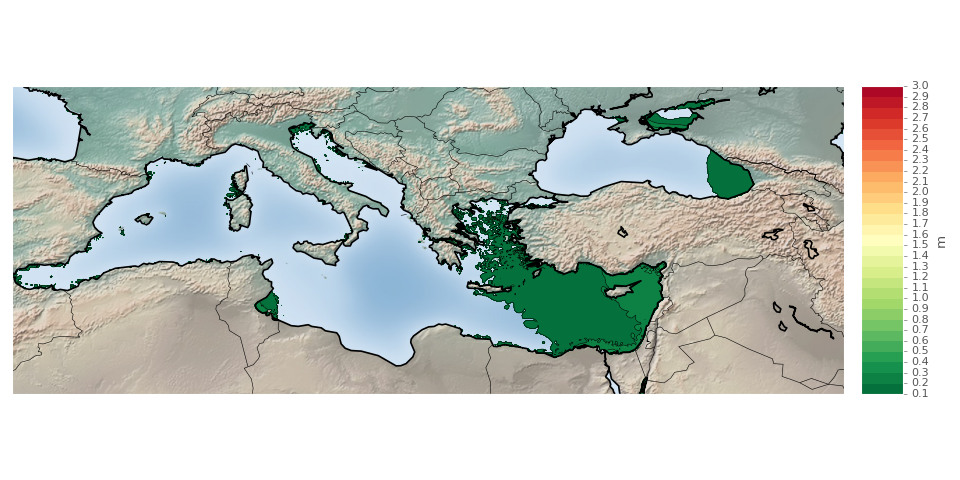

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).WARNING: x coordinate not montonically increasing - contour plot
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

In [55]:
fig = plt.figure(figsize=(12,6))
mhmax=np.ma.masked_array(hmax[:,:],w[:,:].mask) # mask height
CS1 = m.contour(xz,yz,mhmax[:,:],bounds,linewidths=0.5,colors='k',animated=True)
CS2 = m.contourf(xz,yz,mhmax[:,:],bounds,cmap=plt.cm.RdYlGn_r,animated=True)
cb = m.colorbar(CS2,"right", size="5%", pad="2%", ticks=bounds)
cb.set_label('m')
plt.tight_layout()
m.drawcoastlines(linewidth=1.5)
m.drawcountries()
#m.drawparallels(parallels)
#m.drawmeridians(meridians)
m.shadedrelief()

plt.savefig(SAVEPATH+'hmax.png')

In [56]:
plt.ioff()
for i in range(0,u.shape[0],24):
    fig = plt.figure(figsize=(12,6))
    vel=np.sqrt(u[i,:,:]**2+v[i,:,:]**2)
    mvel=np.ma.masked_array(vel,wv) # mask total velocity
    CS1 = m.contour(lons,lats,mvel,10,linewidths=0.5,colors='k',animated=True)
    CS2 = m.contourf(lons,lats,mvel,10,cmap=plt.cm.RdBu_r,animated=True)
    cb = m.colorbar(CS2,"right", size="5%", pad="2%")
    cb.set_label('m/s')
    mu=np.ma.masked_array(u[i,:,:],wv) # mask velocities
    mv=np.ma.masked_array(v[i,:,:],wv)
    Q = m.quiver(lons[::20,::20],lats[::20,::20],mu[::20,::20],mv[::20,::20])#,scale=200)
    qk = plt.quiverkey(Q, 0.1, 0.1, 20, '20 m/s', labelpos='W')
    plt.tight_layout()
    m.drawcoastlines(linewidth=1.5)
    m.drawcountries()
#m.drawparallels(parallels)
#m.drawmeridians(meridians)

    plt.savefig(SAVEPATH+'w{}.png'.format(i))

In [57]:
for i in range(0,u.shape[0],24):
    fig = plt.figure(figsize=(12,6))
    mh=np.ma.masked_array(h[i,:,:],w[:,:].mask) # mask height
    CS1 = m.contour(xz,yz,mh,bounds,linewidths=0.5,colors='k',animated=True)
    CS2 = m.contourf(xz,yz,mh,bounds,cmap=plt.cm.RdYlGn_r,animated=True)
    cb = m.colorbar(CS2,"right", size="5%", pad="2%", ticks=bounds)
    cb.set_label('m')
    plt.tight_layout()
    m.drawcoastlines(linewidth=1.5)
    m.drawcountries()
#m.drawparallels(parallels)
#m.drawmeridians(meridians)

    plt.savefig(SAVEPATH+'h{}.png'.format(i))

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).WARNING: x coordinate not montonically increasing - contour plot
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).WARNING: x coordinate not montonically increasing - contour plot
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see exampl

In [58]:
fdate=datetime.datetime.strftime(date,"%Y%m%d.%H")

In [59]:
date10=date-datetime.timedelta(days=10)

In [60]:
fdate10=datetime.datetime.strftime(date10,"%Y%m%d.%H")

In [61]:
#get data
tota=[]
for n in obs.index.values:
    #print n
    t,s,plat,plon,bname,bid = getmes(date10,date,n)
    dic0={'t_gauge':t, 'sh':[a for [a,b,c] in s], 'tide':[b for [a,b,c] in s], 'ss':[c for [a,b,c] in s]}
    data0=pd.DataFrame(dic0)
    data0=data0.set_index('t_gauge')
    try:
        clat,clon=obs.xs(n).latobs,obs.xs(n).lonobs
        hcw,hw,mlat,mlon,jc,ic=get(fdate10,fdate,path,basename,clat,clon)
    except:
        hw=np.empty(np.size(t))
        hw.fill(np.nan)
        hcw=t
    dic2={'t_his':hcw, 'computed':hw}
    data2=pd.DataFrame.from_dict(dic2)
    data2=data2.set_index('t_his')
    data0=data0.join(data2, how='outer')
    tota.append(data0)

In [62]:
tota=pd.concat(tota, keys=obs.index.values)

In [63]:
tota.head()

sh      ss    tide  computed
     t_his                                                
1630 2016-12-03 00:00:00     NaN     NaN     NaN  0.068368
     2016-12-03 00:03:00   0.476   0.146   0.330       NaN
     2016-12-03 00:08:00   0.476   0.142   0.334       NaN
     2016-12-03 00:16:00   0.477   0.137   0.340       NaN
     2016-12-03 00:21:00   0.475   0.131   0.344       NaN

In [64]:
tota[['sh','tide','ss','computed']] = tota[['sh','tide','ss','computed']].apply(pd.to_numeric)

In [65]:
#tota.xs(ids[0]).plot()

In [66]:
def plotf(i):
    try:
        ax=tota.xs(np.int(i))[['sh','ss','tide']].dropna().apply(pd.to_numeric).plot(style=['r-','g-','b-'])
        tota.xs(np.int(i))[['s_his']].dropna().apply(pd.to_numeric).plot(ax=ax, style=['k-'])
    except:
        tota.xs(np.int(i))[['s_his']].dropna().apply(pd.to_numeric).plot(style=['k-'])

In [67]:
#plotf(ids[1])

In [68]:
#data0.plot(subplots=True)

In [69]:
def fplot(ax,sat,col):
    ax.plot_date(sat.index,sat,'-')
#    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0,24,12)))
#    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M\n%d-%b'))
    ax.xaxis.grid(True, which="minor")
   # ax.yaxis.grid()
#    ax.xaxis.set_major_locator(mdates.MonthLocator())
#    ax.xaxis.set_major_formatter(mdates.DateFormatter('\n\n%Y'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

    return ax

In [70]:
plt.ioff()

In [71]:
ids=obs.index.values

In [ ]:
for i in range(len(ids)):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fplot(ax,tota.xs(ids[i])['ss'].dropna(),'ss')
    fplot(ax,tota.xs(ids[i])['computed'].dropna(),'computed')
    plt.legend()
    ax.set_title(obs.xs(ids[i])['NAME'])
    ax.set_ylim(-.5,0.75)#np.max([0.75,idat[['ss','s_his']].max().max()]))
    ax.set_xlim(date10,date+datetime.timedelta(days=3))
    ax.set_ylabel('Height (m)')
    fig.savefig(SAVEPATH+'g{}.png'.format(ids[i]))

In [73]:
plt.close()

In [74]:
plt.ion()